# Analiza podatkov: Najboljše knjige vseh časov

Analiza 2000 knjig iz seznama najboljših knjig vseh časov s strani Goodreads. Seznam zbranih podatkov je urejen glede na točke posamezne knjige, ki so predvsem odvisne od števila glasujočih ljudi in njihovih ocen. Zbrani podatki vključujejo id knjige, naslov knjige, avtorja knjige, število ocen, povprečje vseh ocen, število glasujočih, zbrane točke, jezik, leto objave ocenjene knjige in leto izdaje prve verzije ocenjene knjige.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
knjige = pd.read_csv('najboljse_knjige_vseh_casov.csv', encoding='latin1',  index_col='id')
pd.options.display.max_rows = 20
knjige

,naslov,avtor,ocene,povprecje,stevilo_glasujocih,tocke,jezik,leto_objave,leto_izdaje
id,,,,,,,,,
2767052,The Hunger Games,Suzanne Collins,"5,185,834",4.34,"28,343","2,780,502",English,2008.0,NaN
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,"1,913,035",4.47,"24,271","2,371,475",English,2004.0,NaN
2657,To Kill a Mockingbird,Harper Lee,"3,461,327",4.26,"20,456","1,987,103",English,2006.0,NaN
1885,Pride and Prejudice,Jane Austen,"2,298,359",4.25,"17,659","1,709,202",English,2000.0,1813.0
41865,Twilight,Stephenie Meyer,"4,065,182",3.57,"14,320","1,405,717",English,2006.0,NaN
19063,The Book Thief,Markus Zusak,"1,364,387",4.36,"11,942","1,154,375",English,2006.0,2005.0
11127,The Chronicles of Narnia,C.S. Lewis,"416,104",4.25,"11,846","1,130,634",English,2002.0,1956.0
7613,Animal Farm,George Orwell,"2,084,122",3.88,"11,553","1,110,955",English,2003.0,NaN
18405,Gone with the Wind,Margaret Mitchell,"926,601",4.28,"10,621","1,030,630",English,1999.0,1936.0


## Najbolj brani avtorji
Zanima me kdo so najbolj brani avtorji glede na število njihovih knjig uvrščenih na seznamu ter glede na njihove ocene.

In [6]:
knjige_po_avtorjih = knjige.groupby('avtor')

In [7]:
naj_avtorji = knjige['avtor'].value_counts()

V naslednjem grafu lahko opazimo koliko knjig posameznega avtorja se pojavi na lestvici 2000 najbolje ocenjenih knjig.

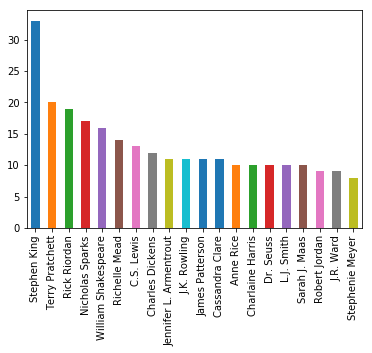

In [8]:
naj_avtorji[:20].plot(kind='bar')

S številom knjig najboolj iztopa Stephen King. Poglejmo si s katerimi deli:

In [9]:
knjige[knjige['avtor'] == 'Stephen King']

,naslov,avtor,ocene,povprecje,stevilo_glasujocih,tocke,jezik,leto_objave,leto_izdaje
id,,,,,,,,,
149267,The Stand,Stephen King,"493,162",4.34,"3,830","353,005",English,1990.0,1978.0
5094,The Drawing of the Three,Stephen King,"168,844",4.23,82,"5,878",English,2003.0,NaN
11602,Hearts in Atlantis,Stephen King,"73,356",3.81,77,"5,550",English,2001.0,NaN
10603,Cujo,Stephen King,"176,120",3.66,83,"4,879",Spanish,2006.0,NaN
107291,Needful Things,Stephen King,"166,137",3.88,71,"4,718",English,1992.0,NaN
11573,The Dead Zone,Stephen King,"143,464",3.90,74,"4,503",English,1980.0,NaN
10625,Dolores Claiborne,Stephen King,"103,024",3.82,60,"3,742",French,1996.0,NaN
10611,The Eyes of the Dragon,Stephen King,"84,343",3.93,55,"3,433",English,1993.0,NaN
10585,Insomnia,Stephen King,"114,101",3.80,51,"3,414",Spanish,2005.0,NaN


In [10]:
knjige.sort_values('povprecje', ascending=False)[:5]

,naslov,avtor,ocene,povprecje,stevilo_glasujocih,tocke,jezik,leto_objave,leto_izdaje
id,,,,,,,,,
24812,The Complete Calvin and Hobbes,Bill Watterson,"30,790",4.82,581,"46,300",English,2005.0,NaN
36629470,CAPTIVE,Gabrielle Estres,149,4.79,38,"3,794",English,NaN,NaN
17332218,Words of Radiance,Brandon Sanderson,"120,124",4.77,83,"7,837",English,2014.0,NaN
862041,Harry Potter Boxset,J.K. Rowling,"211,757",4.74,233,"19,141",English,2007.0,1998.0
59715,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,"18,693",4.73,42,"2,716",English,1991.0,1990.0


In [11]:
knjige[:5]

,naslov,avtor,ocene,povprecje,stevilo_glasujocih,tocke,jezik,leto_objave,leto_izdaje
id,,,,,,,,,
2767052,The Hunger Games,Suzanne Collins,"5,185,834",4.34,"28,343","2,780,502",English,2008.0,NaN
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,"1,913,035",4.47,"24,271","2,371,475",English,2004.0,NaN
2657,To Kill a Mockingbird,Harper Lee,"3,461,327",4.26,"20,456","1,987,103",English,2006.0,NaN
1885,Pride and Prejudice,Jane Austen,"2,298,359",4.25,"17,659","1,709,202",English,2000.0,1813.0
41865,Twilight,Stephenie Meyer,"4,065,182",3.57,"14,320","1,405,717",English,2006.0,NaN


Knjiga z najboljšim povprečjem pripada Billu Wattersonu, medtem ko je prva knjiga na celotni lestvici, razvrščeni po točkah, napisana s strani Suzanne Collins. V obeh tabelah s prvimi petimi knjigami glede na točke in povprečje se pojavi avtorica J.K Rowling. 

## Najbolj brana leta
Poglejmo si, kakšna je popularnost knjig glede na leto njihove izdaje in leto izdaje prve verzije ter povezavo med slednjima.

In [12]:
knjige_po_letih = knjige.groupby('leto_objave')
knjige_po_letih.size().sort_values(ascending=False)

leto_objave
2006.0    178
2003.0    132
2005.0    122
2004.0    120
2002.0    112
2007.0    104
2010.0    102
2009.0    100
2012.0     95
2011.0     88
         ... 
1957.0      1
1963.0      1
1961.0      1
1981.0      1
1966.0      1
1971.0      1
1973.0      1
1974.0      1
1975.0      1
1912.0      1
Length: 62, dtype: int64

In [13]:
knjige['desetletje'] = 10 * (knjige.leto_objave // 10)
knjige_po_desetletjih = knjige.groupby('desetletje')
knjige_po_desetletjih.size()

desetletje
1910.0       1
1930.0       1
1950.0       7
1960.0       9
1970.0      24
1980.0      80
1990.0     324
2000.0    1088
2010.0     440
dtype: int64

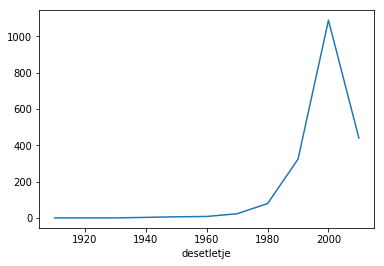

In [14]:
knjige_po_desetletjih.size().plot()

Iz grafa je razvidno, da so najbolje ocenjene knjige okoli 20. stoletja.

In [15]:
knjige_po_letih_prvih_izdaj = knjige.groupby('leto_izdaje')
knjige_po_letih_prvih_izdaj.size().sort_values(ascending=False)

leto_izdaje
2006.0    23
2001.0    21
2005.0    20
1998.0    19
2003.0    19
1985.0    17
1995.0    17
1987.0    15
1996.0    15
2000.0    15
          ..
1842.0     1
1847.0     1
1848.0     1
1854.0     1
1856.0     1
1859.0     1
1861.0     1
1865.0     1
1871.0     1
1008.0     1
Length: 196, dtype: int64

Vidimo, da se najpogostejše pojavljeno leto prvih izdaj ujema z najpogostejše pojavljenim letom izdaj ocenjenih knjig.

In [16]:
%matplotlib inline

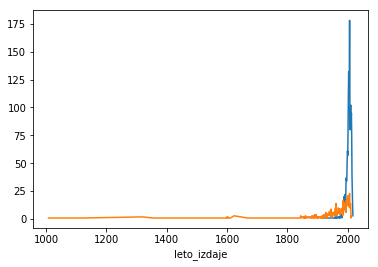

In [17]:
knjige_po_letih.size().plot() and knjige_po_letih_prvih_izdaj.size().plot()

Tudi graf pokaže, da je popularnost po letih izdaje ocenjenih verzij in letih prvotnih izdaj kar usklajena.

## Razvrstitev po jezikih

In [18]:
knjige_po_jezikih = knjige.groupby('jezik')

In [19]:
knjige_po_jezikih.size().sort_values(ascending=False)

jezik
English               1951
Spanish                  9
German                   5
French                   5
Arabic                   5
Portuguese               2
Turkish                  1
Persian                  1
Multiple languages       1
Indonesian               1
dtype: int64

Največ je knjig napisanih v angleščini, kar je tudi pričakovano, glede na to da je vir podatkov angleškega izvora. Oglejmo si grafičen prikaz zastopanosti neangleškh jezikov.

[Text(0, 0.5, '')]

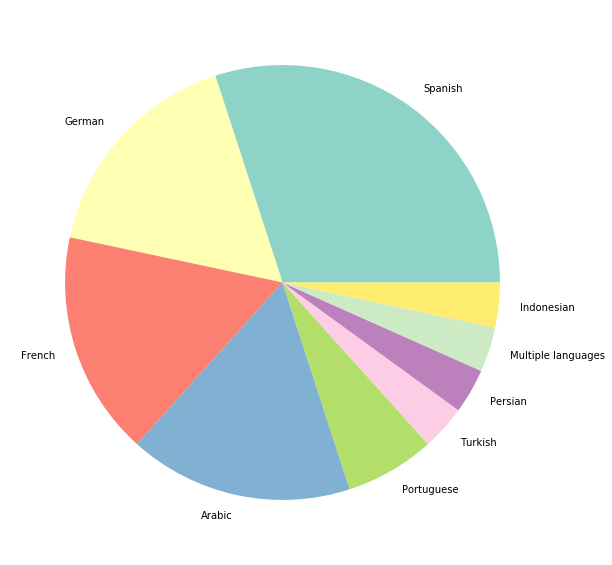

In [20]:
knjige_po_jezikih.size().sort_values(ascending=False)[1:].plot(kind='pie', colormap='Set3', figsize=(10, 10)).set(ylabel='')

In [21]:
knjige_po_jezikih.mean()['povprecje'].sort_values(ascending=False)

jezik
Turkish               4.480000
Multiple languages    4.460000
Indonesian            4.380000
Arabic                4.202000
German                4.156000
Persian               4.090000
English               4.065023
Spanish               3.952222
French                3.826000
Portuguese            3.725000
Name: povprecje, dtype: float64

Pri opazovanju povprečja knjig po jezikih ugotovimo, da so najbolje ocenjene turške knjige in se knjige v angleškem jeziku nahajajo šele na 7. mestu na tej lestvici.

## Povezava med točkami in povprečjem
Zdi se nenavadno, da stran ponuja dva različna načina ocenjevanja knjig: s točkami in (kot običajno) oceno z zvezdicami, katera pa se ne ujemata, ko pride do razvrstitve po njima. Že zgoraj pri analizi najbolj branih avtorjev, smo opazili neujemanje avtorjev razvršenih po povrečjih in po točkah. 

In [22]:
knjige_po_tockah = knjige.groupby('tocke')
knjige_po_povprečjih = knjige.groupby('povprecje')

In [23]:
tabela3=knjige[['naslov','tocke', 'povprecje']].sort_values('povprecje', ascending=False)
tabela3

,naslov,tocke,povprecje
id,,,
24812,The Complete Calvin and Hobbes,"46,300",4.82
36629470,CAPTIVE,"3,794",4.79
17332218,Words of Radiance,"7,837",4.77
862041,Harry Potter Boxset,"19,141",4.74
59715,The Authoritative Calvin and Hobbes: A Calvin ...,"2,716",4.73
26073150,A Court of Mist and Fury,"1,870",4.71
17927395,A Court of Mist and Fury,"17,492",4.71
24536832,Song Bird: Matters of the Heart,"1,685",4.68
99298,The Harry Potter Collection 1-4,"2,714",4.66


In [42]:
knjige['razred_povprecij'] = knjige.povprecje.round(decimals=0)

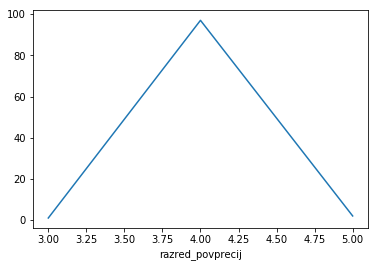

In [34]:
a = knjige[:100].groupby('razred_povprecij').size()
a.plot()

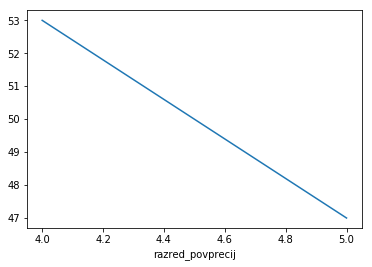

In [43]:
knjige.sort_values('povprecje', ascending=False)[:100].groupby('razred_povprecij').size().plot()

Zgornja dva grafa nam prikazujeta število knjig v posameznem razredu povprečij, pri čemer imamo pri prvem grafu 100 najboljših knjig razvrščenih po točkah v drugem pa po povprečjih. Glede na to da sta drugačne oblike, nam pove da se točke in povprečje ne ujemata. Poglejmo si kakašna bi bila pa grafa pri zadnjih 100 knjigah na lestvicama.

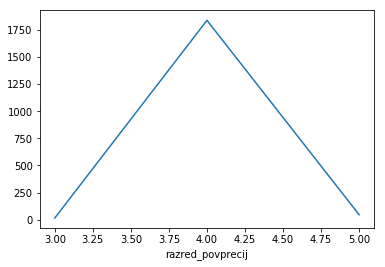

In [48]:
knjige[100:].groupby('razred_povprecij').size().plot()

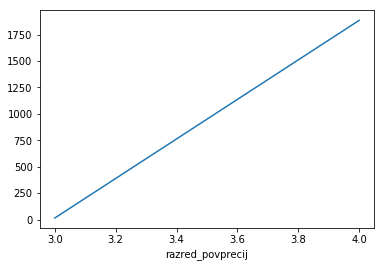

In [49]:
knjige.sort_values('povprecje', ascending=False)[100:].groupby('razred_povprecij').size().plot()

Dobimo podobno situacijo kot prej le, da je graf zadnjih 100 knjig na seznamu urejenem po povprečju naraščajoči. Če zaključimo, lahko predpostavimo, da na vsakih 100 knjig v seznamu najboljših knjig s strani Goodreads najdemo knjige z različnimi povprečji, v razponu od najmanjših do največjih povprečij. Največ pa je knjig s povprečjem zaokroženim na 4. Vse skupaj nam potrdi, da povprečje in točke nista povezana med seboj, v smislu, da bi bil seznam razvrščen po povprečjih drugačen od seznama knjig razvrščenega po točkah.